# xarray demo


In [2]:
import os
import urllib
import pandas as pd
import numpy as np

import xarray as xr


In [3]:
temp_data = np.array(
    [np.zeros((5, 5)),
     np.ones((5, 5)),
     (np.ones((5, 5))*2)
     ]).astype(int)
temp_data

array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])

In [10]:
dims = ('time','lat','lon')

coords = {
    'time': pd.date_range('2022-09-01',' 2022-09-03'),
    'lat': np.arange(70, 20, -10),
    'lon': np.arange(60, 110, 10)
}

In [11]:
attrs = {
    'title': 'temp across stations',
    'standard_name': 'air_temperature',
    'units': 'degrees_c'
}

In [12]:
temp = xr.DataArray(data = temp_data,
                    dims = dims,
                    coords = coords,
                    attrs = attrs)
temp

<xarray.DataArray (time: 3, lat: 5, lon: 5)> Size: 600B
array([[[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]],

       [[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          temp across stations
    standard_name:  air_temperature
    units:          degrees_c

In [14]:
temp.attrs['description'] = 'simple example'

In [17]:
temp.lat.attrs = {
    'description': 'asdf',
    'standard_name': 'grid_lat',
    'units': 'asdffdas'
}

In [21]:
temp.loc['2022-09-01',:,:]

<xarray.DataArray (lat: 5, lon: 5)> Size: 200B
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          temp across stations
    standard_name:  air_temperature
    units:          degrees_c
    description:    simple example

In [26]:
temp.sel(time = '2022-09-05', lat = 50,  method = 'nearest')

<xarray.DataArray (lon: 5)> Size: 40B
array([2, 2, 2, 2, 2])
Coordinates:
    time     datetime64[ns] 8B 2022-09-03
    lat      int64 8B 50
  * lon      (lon) int64 40B 60 70 80 90 100
Attributes:
    title:          temp across stations
    standard_name:  air_temperature
    units:          degrees_c
    description:    simple example

In [27]:
temp.sel(time = '2022-09-01', lat = 50, lon = slice(60,80))

<xarray.DataArray (lon: 3)> Size: 24B
array([0, 0, 0])
Coordinates:
    time     datetime64[ns] 8B 2022-09-01
    lat      int64 8B 50
  * lon      (lon) int64 24B 60 70 80
Attributes:
    title:          temp across stations
    standard_name:  air_temperature
    units:          degrees_c
    description:    simple example

In [29]:
temp.mean()

<xarray.DataArray ()> Size: 8B
array(1.)

In [30]:
temp.to_dataset(name = 'temperature')

<xarray.Dataset> Size: 704B
Dimensions:      (time: 3, lat: 5, lon: 5)
Coordinates:
  * time         (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat          (lat) int64 40B 70 60 50 40 30
  * lon          (lon) int64 40B 60 70 80 90 100
Data variables:
    temperature  (time, lat, lon) int64 600B 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2

In [31]:
avg_temp = temp.mean(dim='time')
avg_temp

<xarray.DataArray (lat: 5, lon: 5)> Size: 200B
array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])
Coordinates:
  * lat      (lat) int64 40B 70 60 50 40 30
  * lon      (lon) int64 40B 60 70 80 90 100

In [32]:
data_vars = {
    'temp': temp,
    'avg_temp': avg_temp
}

attrs = {
    'title': 'temp at stations'
}

temp_dataset = xr.Dataset(data_vars = data_vars, attrs = attrs)
temp_dataset

<xarray.Dataset> Size: 904B
Dimensions:   (time: 3, lat: 5, lon: 5)
Coordinates:
  * time      (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat       (lat) int64 40B 70 60 50 40 30
  * lon       (lon) int64 40B 60 70 80 90 100
Data variables:
    temp      (time, lat, lon) int64 600B 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2
    avg_temp  (lat, lon) float64 200B 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
Attributes:
    title:    temp at stations

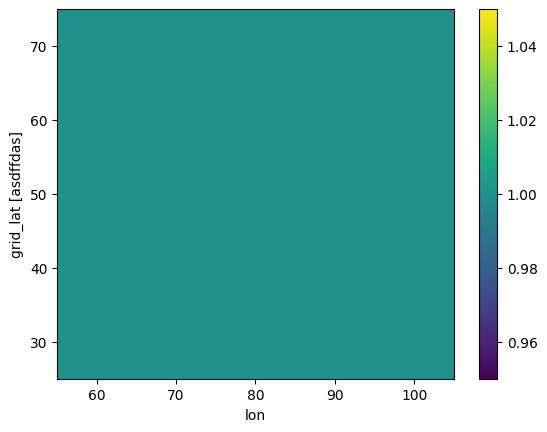

In [33]:
avg_temp.plot()


In [34]:
fp = os.path.join(os.getcwd(), 'temp_dataset.nc')

In [35]:
fp

'/home/elucas/scalable-computing-examples/temp_dataset.nc'

In [36]:
temp_dataset.to_netcdf(fp)

In [37]:
check = xr.open_dataset(fp)

In [38]:
check == temp_dataset

<xarray.Dataset> Size: 204B
Dimensions:   (time: 3, lat: 5, lon: 5)
Coordinates:
  * time      (time) datetime64[ns] 24B 2022-09-01 2022-09-02 2022-09-03
  * lat       (lat) int64 40B 70 60 50 40 30
  * lon       (lon) int64 40B 60 70 80 90 100
Data variables:
    temp      (time, lat, lon) bool 75B True True True True ... True True True
    avg_temp  (lat, lon) bool 25B True True True True ... True True True True

In [39]:
check.equals(temp_dataset)

True